In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score 

In [5]:
df = pd.read_csv('cleaned_data_without_outliers.csv')
print (df)

     R&D Spend  Marketing Spend       State        Profit
0    165349.20      471784.1000    New York  192261.83000
1    153441.51      407934.5400     Florida  191050.39000
2    144372.41      383199.6200    New York  182901.99000
3    131876.90      362861.3600    New York  156991.12000
4    134615.46      127716.8200  California  156122.51000
..         ...              ...         ...           ...
973  105127.00      271621.8728     Florida  138841.98810
974   46798.00      159075.9080  California   89012.02672
975   97209.00      256344.0701    New York  132077.70900
976   54135.00      173232.6695  California   95279.96251
977  134970.00      329204.0228  California  164336.60550

[978 rows x 4 columns]


In [6]:
print(df.head())

# Get information about the dataset
print(df.info())

# Summary statistics
print(df.describe())

   R&D Spend  Marketing Spend       State     Profit
0  165349.20        471784.10    New York  192261.83
1  153441.51        407934.54     Florida  191050.39
2  144372.41        383199.62    New York  182901.99
3  131876.90        362861.36    New York  156991.12
4  134615.46        127716.82  California  156122.51
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        978 non-null    float64
 1   Marketing Spend  978 non-null    float64
 2   State            978 non-null    object 
 3   Profit           978 non-null    float64
dtypes: float64(3), object(1)
memory usage: 30.7+ KB
None
           R&D Spend  Marketing Spend         Profit
count     978.000000       978.000000     978.000000
mean    81805.722587    226835.568128  118919.528574
std     46519.243938     90978.269810   39802.675649
min         0.000000         0.0

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


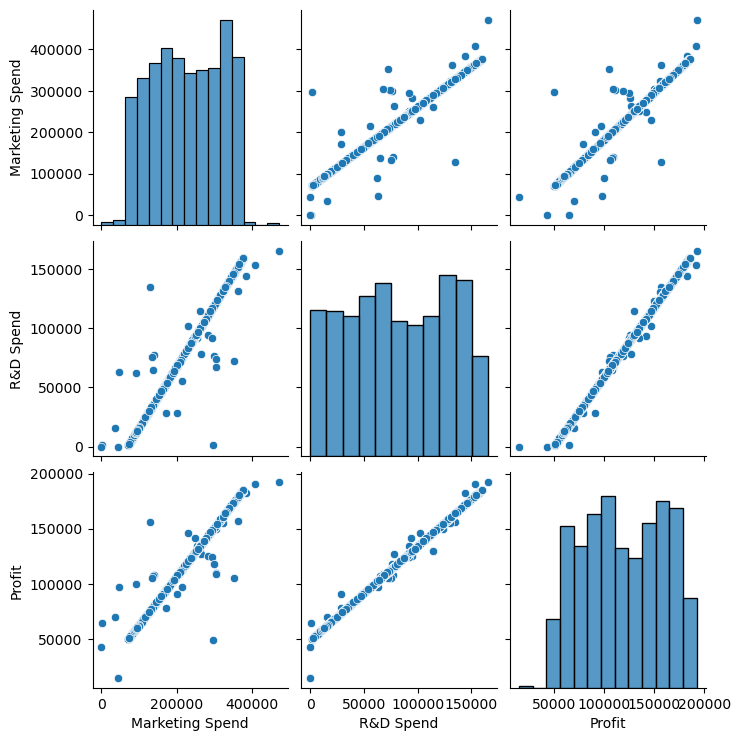

In [4]:
numerical_columns = ['Marketing Spend', 'R&D Spend', 'Profit']
df_numeric = df[numerical_columns]
sns.pairplot(df_numeric)
plt.show()

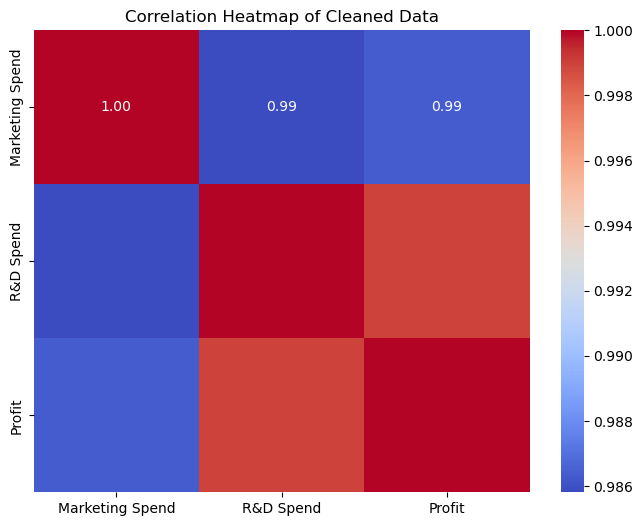

In [9]:
numerical_columns = ['Marketing Spend', 'R&D Spend', 'Profit']
df_numeric = df[numerical_columns]

# Calculate correlation matrix
corr_matrix = df_numeric.corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Cleaned Data')
plt.show()

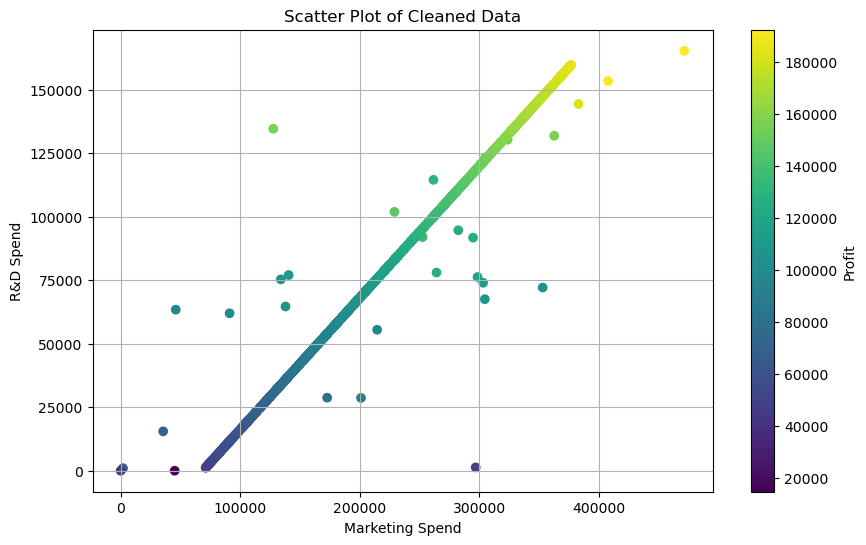

In [8]:
x_column = 'Marketing Spend'
y_column = 'R&D Spend'
z_column = 'Profit'

# Create scatter plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.scatter(df[x_column], df[y_column], c=df[z_column], cmap='viridis')
plt.colorbar(label=z_column)  # Add color bar with label
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title('Scatter Plot of Cleaned Data')
plt.grid(True)
plt.show()

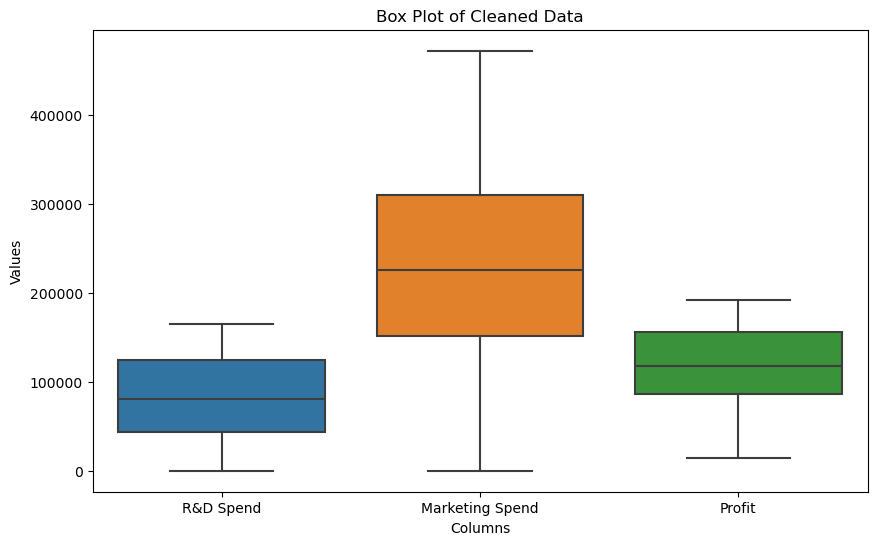

In [10]:
numeric_columns = df.select_dtypes(include=['number'])

plt.figure(figsize=(10,6))
sns.boxplot(data = numeric_columns)
plt.title('Box Plot of Cleaned Data')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()     

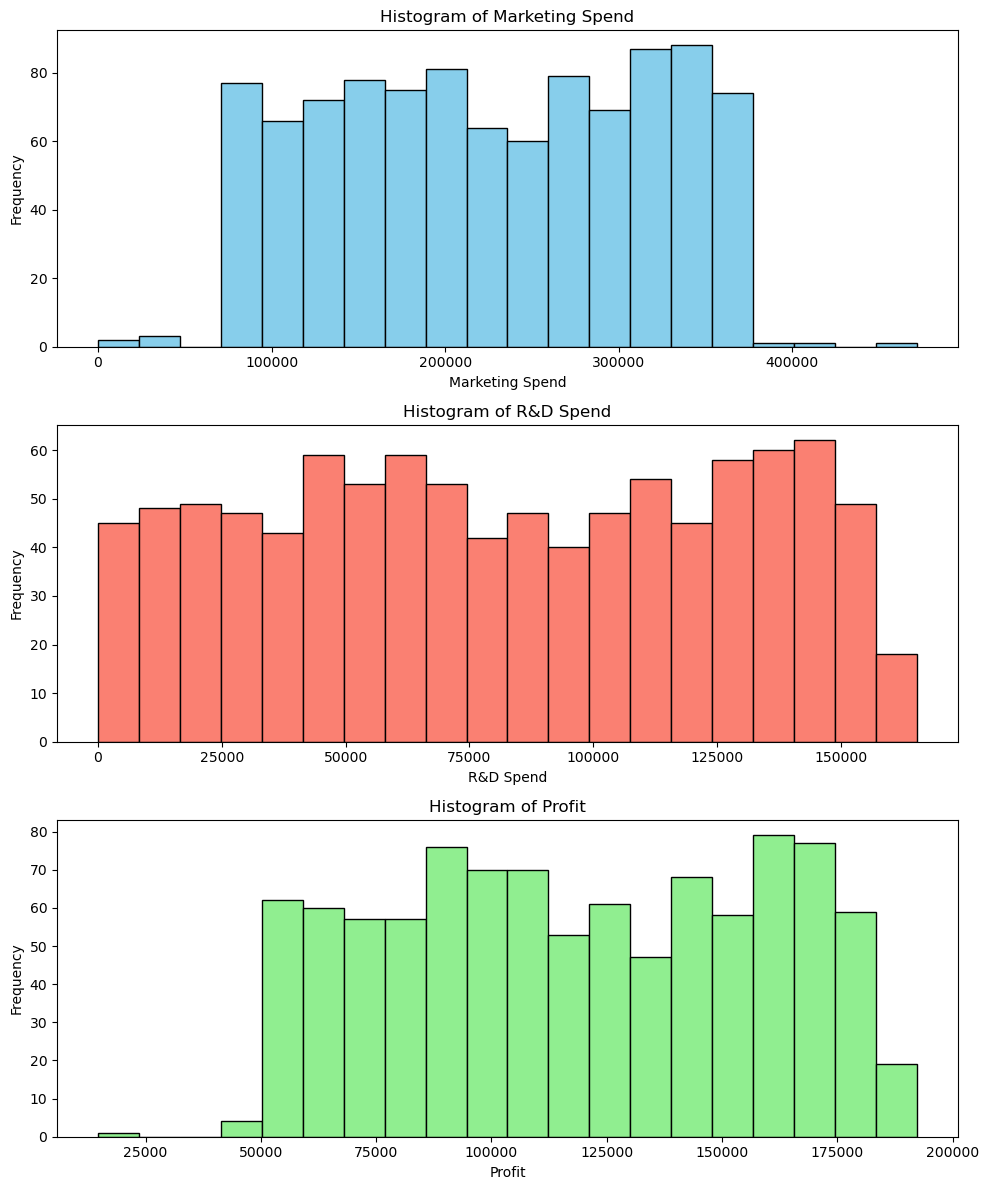

In [7]:
column1 = 'Marketing Spend'
column2 = 'R&D Spend'
column3 = 'Profit'

# Create figure and axes for subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 12))  # Adjust figure size as needed

# Plot histogram for column1
axs[0].hist(df[column1], bins=20, color='skyblue', edgecolor='black')
axs[0].set_title(f'Histogram of {column1}')
axs[0].set_xlabel(column1)
axs[0].set_ylabel('Frequency')

# Plot histogram for column2
axs[1].hist(df[column2], bins=20, color='salmon', edgecolor='black')
axs[1].set_title(f'Histogram of {column2}')
axs[1].set_xlabel(column2)
axs[1].set_ylabel('Frequency')

# Plot histogram for column3
axs[2].hist(df[column3], bins=20, color='lightgreen', edgecolor='black')
axs[2].set_title(f'Histogram of {column3}')
axs[2].set_xlabel(column3)
axs[2].set_ylabel('Frequency')

# Adjust layout and display plot
plt.tight_layout()
plt.show()

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


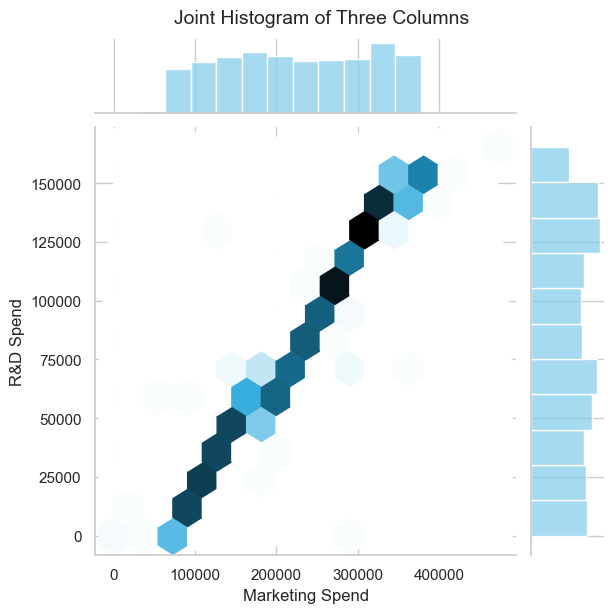

In [8]:
x_column = 'Marketing Spend'
y_column = 'R&D Spend'
z_column = 'Profit'

# Create joint histogram using seaborn
sns.set(style="whitegrid")
sns.jointplot(x=x_column, y=y_column, data=df, kind="hex", color="skyblue")
plt.suptitle('Joint Histogram of Three Columns', fontsize=14, y=1.02)
plt.show()

In [9]:
#Data Splitting
# Define features (X) and target variable (y)
X = df.drop('Profit', axis=1)  # Adjust 'target_column' to your target variable
y = df['Profit']

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
print("Training Set (X_train):")
print(X_train.head())
print("\nTraining Set (y_train):")
print(y_train.head())

print("\nTesting Set (X_test):")
print(X_test.head())
print("\nTesting Set (y_test):")
print(y_test.head())

Training Set (X_train):
     R&D Spend  Marketing Spend       State
784     7214.0      82698.47188     Florida
909    86851.0     236358.28090     Florida
33     89939.0     242316.58530     Florida
31     87151.0     236937.13170    New York
731    91798.0     245903.53090  California

Training Set (y_train):
784     55195.75709
909    123228.95900
33     125867.01080
31     123485.24640
731    127455.13840
Name: Profit, dtype: float64

Testing Set (X_test):
     R&D Spend  Marketing Spend       State
199     6166.0      80676.35302    New York
543    56983.0     178727.89330  California
174    31835.0     130204.75860    New York
928   131981.0     323436.73910    New York
66    106761.0     274774.68020    New York

Testing Set (y_test):
199     54300.45973
543     97712.98433
174     76229.26494
928    161783.12860
66     140237.90020
Name: Profit, dtype: float64


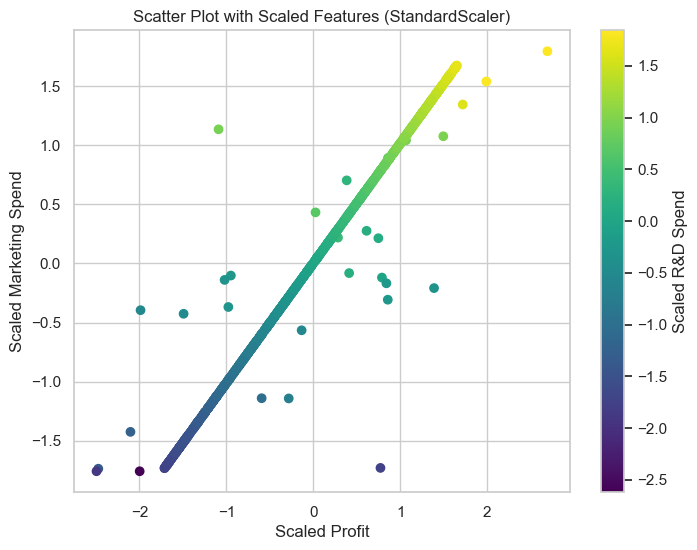

In [14]:
int_columns = ['Marketing Spend', 'R&D Spend', 'Profit']  # Adjust column names

scaler = StandardScaler()

# Fit and transform the selected columns using StandardScaler
df_scaled = pd.DataFrame(scaler.fit_transform(df[int_columns]), columns=int_columns)

# Plot scatter plot using the scaled features
plt.figure(figsize=(8, 6))
plt.scatter(df_scaled['Marketing Spend'], df_scaled['R&D Spend'], c=df_scaled['Profit'], cmap='viridis')
plt.colorbar(label='Scaled R&D Spend')
plt.xlabel('Scaled Profit')
plt.ylabel('Scaled Marketing Spend')
plt.title('Scatter Plot with Scaled Features (StandardScaler)')
plt.grid(True)
plt.show()

In [17]:
print(X_train.columns)
print(X_test.columns)

Index(['R&D Spend', 'Marketing Spend', 'State'], dtype='object')
Index(['R&D Spend', 'Marketing Spend', 'State'], dtype='object')


In [21]:
int_columns = ['Marketing Spend', 'R&D Spend']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train[int_columns])

# Transform the testing data (using the same scaler fitted on the training data)
X_test_scaled = scaler.transform(X_test[int_columns])

# Now X_train_scaled and X_test_scaled contain the scaled features

In [24]:
# Print the first few rows of the scaled training features
print("Scaled Training Features (X_train_scaled):")
print(X_train_scaled[:5])

# Print the first few rows of the scaled testing features
print("\nScaled Testing Features (X_test_scaled):")
print(X_test_scaled[:5])

Scaled Training Features (X_train_scaled):
[[-1.60826135 -1.62782879]
 [ 0.08609499  0.09107747]
 [ 0.15179526  0.15772969]
 [ 0.09247779  0.09755275]
 [ 0.19134733  0.19785484]]

Scaled Testing Features (X_test_scaled):
[[-1.63055859 -1.6504491 ]
 [-0.5493764  -0.55360141]
 [-1.0844251  -1.09640256]
 [ 1.0462806   1.06517543]
 [ 0.50970003  0.52082022]]


In [29]:
#MODEL TRAINING AND EVALUATION
X = df.drop(['Profit'], axis=1)  # Features (excluding 'Profit' column)
y = df['Profit']  # Target variable is 'Profit'

# Perform one-hot encoding for categorical feature 'State'
X_encoded = pd.get_dummies(X, columns=['State'], drop_first=True)

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 6078985.025632274
R-squared: 0.9963081614561359


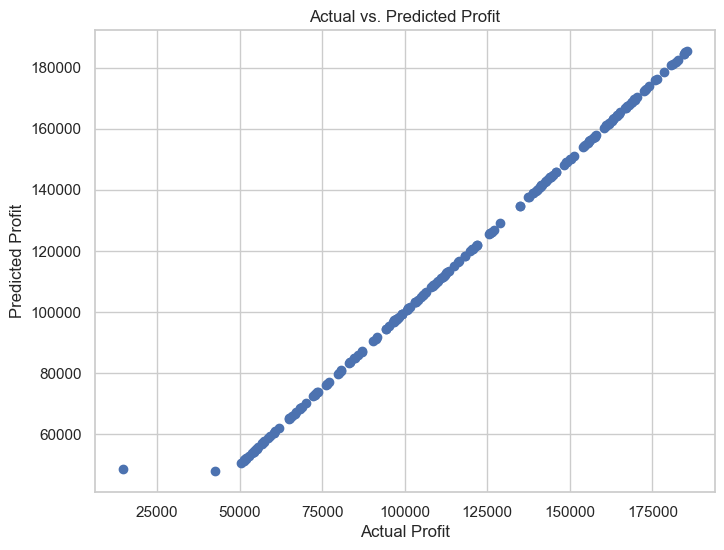

In [30]:
# Plotting actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Actual vs. Predicted Profit")
plt.show()

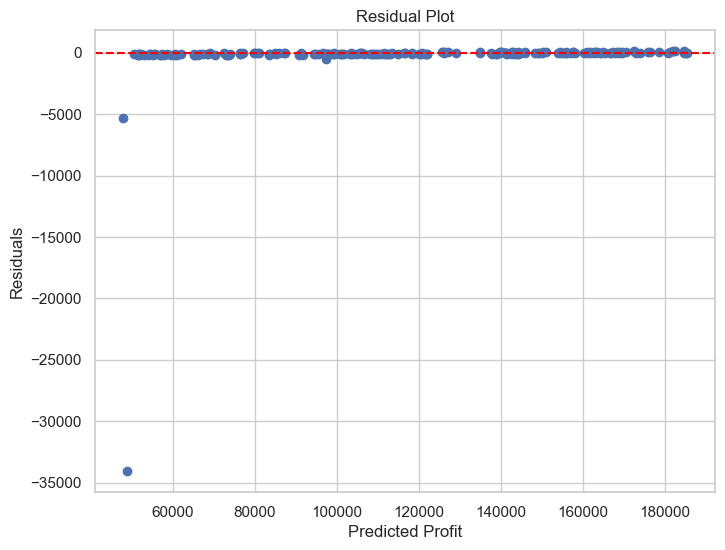

In [31]:
# Calculate residuals
residuals = y_test - y_pred

# Plotting residuals vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Profit")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

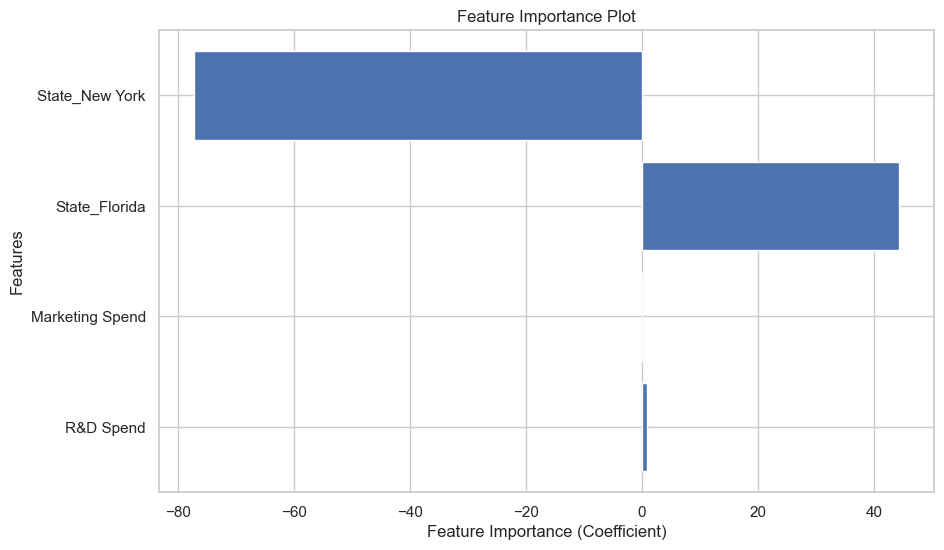

In [32]:
# Get feature importance (coefficients) from the linear regression model
feature_importance = model.coef_

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(X_encoded.columns, feature_importance)
plt.xlabel("Feature Importance (Coefficient)")
plt.ylabel("Features")
plt.title("Feature Importance Plot")
plt.show()